### Zadanie

1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('./data/Accidents.csv')
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [5]:
Fatal = data[data['Accident_Severity'] == 1]
Serious = data[data['Accident_Severity'] == 2]
Slight = data[data['Accident_Severity'] == 3]
print(data.shape)
print(Fatal.shape)
print(Serious.shape)
print(Slight.shape)

(198735, 32)
(2913, 32)
(25029, 32)
(170793, 32)


2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [6]:
# `frac` udáva koľko príkladov sa má náhodne vybrať (0.1 = 10%), `random_state` inicializuje generátor
# náhodných čísel, aby sme vždy dostali rovnaký výber
sample_data = Slight.sample(frac=0.1, random_state=1234)

In [7]:
accidents_slight_sample = Slight.sample(frac=0.1, random_state=1234)
print(accidents_slight_sample.shape)

(17079, 32)


3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 29 650 príkladov. (2b)

In [8]:
Accidents = pd.concat([accidents_slight_sample, Fatal, Serious], axis =0)
print(Accidents.shape)

(45021, 32)


4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [9]:
Vehicles = pd.read_csv('./data/Vehicles.csv')
print(Vehicles.shape)

(366236, 22)


In [10]:
Accidents = pd.merge(Accidents, Vehicles, on = "Accident_Index", how = "inner")
print(Accidents.shape)

(79382, 53)


5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [11]:
print(Accidents.shape)

(79382, 53)


In [12]:
drop_list = ["Day_of_Week", "1st_Road_Class", "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle", "Accident_Severity"]
test = Accidents.drop(Accidents.columns.difference(drop_list), axis=1)
print(test.shape)

(79382, 13)


6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79382 entries, 0 to 79381
Data columns (total 13 columns):
Accident_Severity          79382 non-null int64
Day_of_Week                79382 non-null int64
1st_Road_Class             79382 non-null int64
Road_Type                  79382 non-null int64
Light_Conditions           79382 non-null int64
Weather_Conditions         79382 non-null int64
Road_Surface_Conditions    79382 non-null int64
Urban_or_Rural_Area        79382 non-null int64
Vehicle_Type               79382 non-null int64
Sex_of_Driver              79382 non-null int64
Age_of_Driver              79382 non-null int64
Engine_Capacity_(CC)       79382 non-null int64
Age_of_Vehicle             79382 non-null int64
dtypes: int64(13)
memory usage: 8.5 MB


In [14]:
Accidents.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                            33
Location_Northing_OSGR                           33
Longitude                                        33
Latitude                                         33
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             11
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [146]:
test.isna().sum()

Accident_Severity          0
Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              7
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
Age_ordinal                0
dtype: int64

In [15]:
test = test.replace(-1, np.nan)
test.isna().sum()

Accident_Severity              0
Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions       80
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
dtype: int64

In [16]:
test.head()

,Accident_Severity,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,3,2,4,6,1,8,1.0,1,9.0,1.0,NaN,NaN,NaN
1,3,2,4,6,1,8,1.0,1,1.0,1.0,26.0,NaN,NaN
2,3,5,1,3,1,1,2.0,2,9.0,2.0,72.0,998.0,5.0
3,3,5,1,3,1,1,2.0,2,9.0,2.0,44.0,1461.0,1.0
4,3,5,1,3,1,1,2.0,2,19.0,1.0,40.0,2461.0,1.0


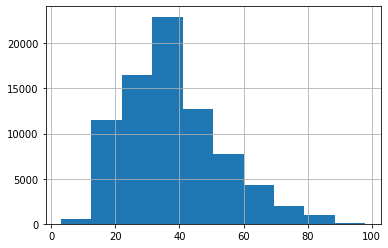

In [36]:
p = test["Age_of_Driver"].hist()

In [37]:
Age_mean = test["Age_of_Driver"].mean()
Age_median = test["Age_of_Driver"].median()
print("Age of Driver mean: {0:.4f}, median: {1:.4f}".format(Age_mean, Age_median))


Age of Driver mean: 37.6817, median: 36.0000


In [38]:
test["Age_of_Driver"].fillna(Age_median, inplace=True)
test["Age_of_Driver"].isna().sum() 

0

In [39]:
AgeV_mean = test["Age_of_Vehicle"].mean()
AgeV_median = test["Age_of_Vehicle"].median()
print("Age of Vehicle mean: {0:.4f}, median: {1:.4f}".format(AgeV_mean, AgeV_median))

Age of Vehicle mean: 6.4310, median: 6.0000


In [40]:
test["Age_of_Vehicle"].fillna(AgeV_median, inplace=True)
test["Age_of_Vehicle"].isna().sum() 

0

In [41]:
Engine_mean = test["Engine_Capacity_(CC)"].mean()
Engine_median = test["Engine_Capacity_(CC)"].median()
print("Engine_Capacity_(CC) mean: {0:.4f}, median: {1:.4f}".format(Engine_mean, Engine_median))

Engine_Capacity_(CC) mean: 1817.5495, median: 1597.0000


In [42]:
test["Engine_Capacity_(CC)"].fillna(Engine_median, inplace=True)
test["Engine_Capacity_(CC)"].isna().sum() 

0

In [43]:
test.isna().sum()

Accident_Severity          0
Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              7
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
dtype: int64

In [44]:
test["Road_Surface_Conditions"].value_counts()

1.0    54780
2.0    23007
4.0     1147
3.0      358
5.0       90
Name: Road_Surface_Conditions, dtype: int64

In [45]:
test["Road_Surface_Conditions"].fillna(1.0, inplace=True)
test["Road_Surface_Conditions"].isna().sum() 

0

In [46]:
test["Vehicle_Type"].value_counts()

9.0     55709
5.0      4434
1.0      3929
19.0     3514
21.0     2463
3.0      2121
11.0     2018
2.0      1321
8.0      1180
4.0       908
20.0      698
90.0      532
10.0      281
17.0      230
16.0       32
18.0       12
Name: Vehicle_Type, dtype: int64

In [47]:
test["Vehicle_Type"].fillna(9.0, inplace=True)
test["Vehicle_Type"].isna().sum() 

0

In [48]:
test.isna().sum()

Accident_Severity          0
Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              7
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
dtype: int64

In [49]:
test["Sex_of_Driver"].value_counts()

1.0    56005
2.0    19020
3.0     4350
Name: Sex_of_Driver, dtype: int64

In [50]:
test["Vehicle_Type"].fillna(1.0, inplace=True)
test["Vehicle_Type"].isna().sum() 

0

7. Pomocou konfigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)

In [52]:
test["Age_ordinal"] = pd.qcut(test["Age_of_Driver"], 3)
test["Age_ordinal"].value_counts()

(2.999, 30.0]    27100
(41.0, 98.0]     26317
(30.0, 41.0]     25965
Name: Age_ordinal, dtype: int64

In [54]:
test["Age_ordinal"] = pd.cut(test["Age_of_Driver"], bins=[0, 30, 41, 100], include_lowest=True, labels=["Early adulthood", "Middle Adulthood", "Late Adulthood"])
test["Age_ordinal"].value_counts()

Early adulthood     27100
Late Adulthood      26317
Middle Adulthood    25965
Name: Age_ordinal, dtype: int64

In [223]:
pd.pivot_table(test, index=["Age_ordinal", "Sex_of_Driver"], columns="Day_of_Week", values="Accident_Severity", aggfunc="mean")
#pd.pivot_table(data, index=["sex", "pclass"], columns="age_ordinal", values="survived", aggfunc="mean")

Day_of_Week                            1         2         3         4  \
Age_ordinal      Sex_of_Driver                                           
Early adulthood  1.0            2.260240  2.289203  2.322234  2.325376   
                 2.0            2.378162  2.473118  2.469667  2.440349   
                 3.0            2.142857  2.857143  2.428571  2.461538   
Middle Adulthood 1.0            2.264706  2.366744  2.368330  2.354893   
                 2.0            2.386667  2.501754  2.476190  2.483660   
                 3.0            2.348409  2.486381  2.397338  2.421687   
Late Adulthood   1.0            2.195709  2.292340  2.282114  2.302966   
                 2.0            2.283019  2.399374  2.445905  2.421596   
                 3.0            2.250000  2.000000  2.111111  2.666667   

Day_of_Week                            5         6         7  
Age_ordinal      Sex_of_Driver                                
Early adulthood  1.0            2.324188  2.295658  2.229289  
                 2.0            2.505664  2.480462  2.410367  
                 3.0            2.357143  2.400000  2.250000  
Middle Adulthood 1.0            2.359709  2.353442  2.307231  
                 2.0            2.476082  2.478261  2.417445  
                 3.0            2.387889  2.429851  2.352507  
Late Adulthood   1.0            2.292434  2.280277  2.267264  
                 2.0            2.385740  2.394353  2.312727  
                 3.0            2.285714  2.500000  2.222222

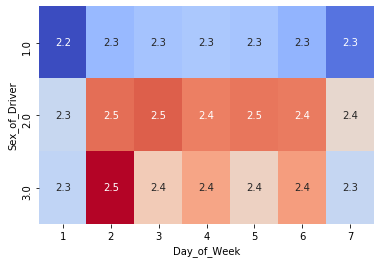

In [224]:
heatmap_data = pd.pivot_table(test, values='Accident_Severity', index=['Sex_of_Driver'], columns='Day_of_Week') # vytvoríme pivot table - hodnoty celkového účtu podľa veľkosti skupinky a dňa
g = sns.heatmap(heatmap_data, annot=True, cmap="coolwarm",  cbar=False)                   # vykreslíme heatmapu

8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [225]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79382 entries, 0 to 79381
Data columns (total 14 columns):
Accident_Severity          79382 non-null int64
Day_of_Week                79382 non-null int64
1st_Road_Class             79382 non-null int64
Road_Type                  79382 non-null int64
Light_Conditions           79382 non-null int64
Weather_Conditions         79382 non-null int64
Road_Surface_Conditions    79382 non-null float64
Urban_or_Rural_Area        79382 non-null int64
Vehicle_Type               79382 non-null float64
Sex_of_Driver              79375 non-null float64
Age_of_Driver              79382 non-null float64
Engine_Capacity_(CC)       79382 non-null float64
Age_of_Vehicle             79382 non-null float64
Age_ordinal                79382 non-null category
dtypes: category(1), float64(6), int64(7)
memory usage: 11.1 MB


,Accident_Severity,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Age_ordinal
0,3,2,4,6,1,8,1.0,1,9.0,1.0,36.0,1597.0,6.0,Middle Adulthood
1,3,2,4,6,1,8,1.0,1,1.0,1.0,26.0,1597.0,6.0,Early adulthood
2,3,5,1,3,1,1,2.0,2,9.0,2.0,72.0,998.0,5.0,Late Adulthood
3,3,5,1,3,1,1,2.0,2,9.0,2.0,44.0,1461.0,1.0,Late Adulthood
4,3,5,1,3,1,1,2.0,2,19.0,1.0,40.0,2461.0,1.0,Middle Adulthood


In [226]:
Accidents.shape

(79382, 22)

In [259]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 
Accidentis =  Accidents.drop(['Age_ordinal'], axis=1 )
Accidentis = pd.DataFrame(scaler.fit_transform(Accidentis), index=Accidentis.index, columns=Accidentis.columns)
Accidentis.shape 

(79382, 21)

In [242]:
Accidentis = pd.get_dummies(test, columns=['Day_of_Week', 'Sex_of_Driver']) 

In [243]:
Accidentis.shape

(79382, 22)

9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [278]:
from sklearn.model_selection import train_test_split
#X_Accidents = Accidents.drop(['Accident_Severity', 'Age_ordinal'], axis=1 )
X_Accidentis = Accidentis.drop(['Accident_Severity'], axis=1 )
X_Accidentis.shape

(79382, 20)

In [279]:
y_Accidentis = Accidents["Accident_Severity"]
y_Accidentis.shape

(79382,)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_Accidentis, y_Accidentis, test_size=0.3, random_state=1)

In [281]:
X_train.shape

(55567, 20)

10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [284]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000002365E0B31E0>)

Atribut 0: 0.002794
Atribut 1: 0.006250
Atribut 2: 0.006710
Atribut 3: 0.001695
Atribut 4: 0.001783
Atribut 5: 0.018972
Atribut 6: 0.013128
Atribut 7: 0.004563
Atribut 8: 0.011043
Atribut 9: 0.000000
Atribut 10: 0.000527
Atribut 11: 0.000846
Atribut 12: 0.000000
Atribut 13: 0.003782
Atribut 14: 0.000000
Atribut 15: 0.000000
Atribut 16: 0.002177
Atribut 17: 0.010648
Atribut 18: 0.004233
Atribut 19: 0.001832


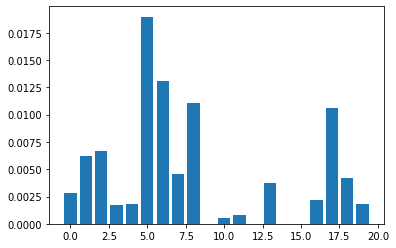

In [285]:
import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
	print('Atribut %d: %f' % (i, fs.scores_[i]))
    
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [286]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier()             

model.fit(X_train, y_train)                 

y_model = model.predict(X_test)  

In [287]:
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.5279445727482679


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [236]:
from sklearn.tree import DecisionTreeClassifier # Importovanie triedy zodpovedajúcej modelu, ktorý budeme trénovať
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)   # Inicializácia stromového modelu   
dt.fit(X_train, y_train)        # Trénovanie modelu na trénovacej množine 
y_dt = dt.predict(X_test)       # Otestovanie modelu na testovacej množine

from sklearn.metrics import accuracy_score,precision_score, recall_score # vypočítanie metrík kvality modelu

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_dt)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_dt)}")

cm = confusion_matrix(y_test, y_dt)  # vypísanie kontigenčnej tabuľky
print(cm)

Presnosť (accuracy) modelu: 0.5586395129120302


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=500, max_depth=3)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.5404996850724333
[[    0  1480    10]
 [    0 12355   243]
 [    0  9210   517]]


12. Identifikujte model, ktorý dáva najlepšie výsledky s prednastavenými parametrami. V tomto kroku sa posnažte vyladiť model nájdením najvhodnejších parametrov pomocou `GridSearchCV`. Nájdite a vypíšte najlepšiu kombináciu parametrov. (4b)

In [ ]:
# YOUR CODE HERE

13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [1]:
# YOUR CODE HERE